In [2]:
!pip install tensorflow



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl (1.6 MB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


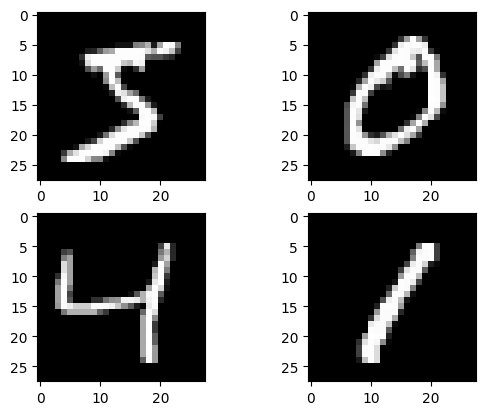

In [3]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train,y_train), (X_test,y_test) = mnist.load_data()


# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import utils


In [5]:
#fix random seed fpr responsibility
seed = 7
numpy.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples]width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# visible layer -> Convolutional layer -> max pooling layer -> Dropout layer -> Flatten layer -> hidden layer -> output layer

def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

C:\Users\lenovo\OneDrive\Documents\Desktop\digit Recognition\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9308 - loss: 0.2376 - val_accuracy: 0.9782 - val_loss: 0.0757
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9780 - loss: 0.0735 - val_accuracy: 0.9823 - val_loss: 0.0552
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9847 - loss: 0.0507 - val_accuracy: 0.9853 - val_loss: 0.0442
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9875 - loss: 0.0414 - val_accuracy: 0.9866 - val_loss: 0.0379
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.9894 - val_loss: 0.0333
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9880 - val_loss: 0.0363
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.9892 - val_loss: 0.0312
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9945 - loss: 0.0184 - val_acc

In [11]:
!pip install scikit-learn seaborn


  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     --------- ----------------------------- 71.7/294.9 kB 1.9 MB/s eta 0:00:01
     ------------------ ------------------- 143.4/294.9 kB 1.7 MB/s eta 0:00:01
     ----------------------------- -------- 225.3/294.9 kB 1.7 MB/s eta 0:00:01
     ------------------------------------ - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     --------------------------------------- 0.0/11.3 MB 660.6 kB/s eta 0:00:18
     --------------------------------------- 0.1/11.3 MB


[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


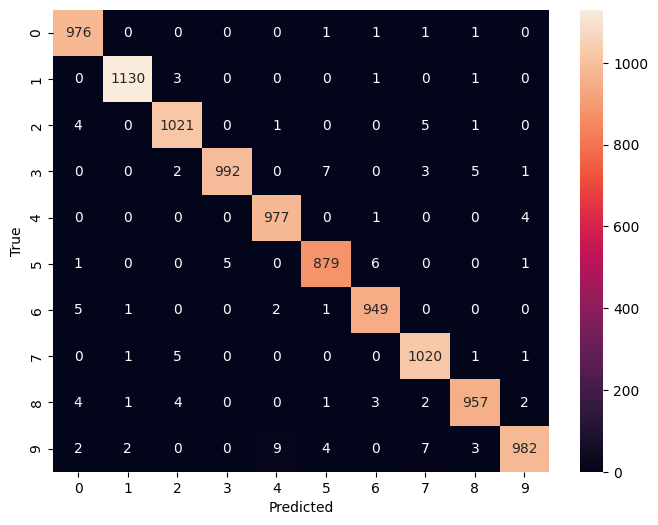

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [15]:
!pip install opencv-python


  Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl (40.2 MB)



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


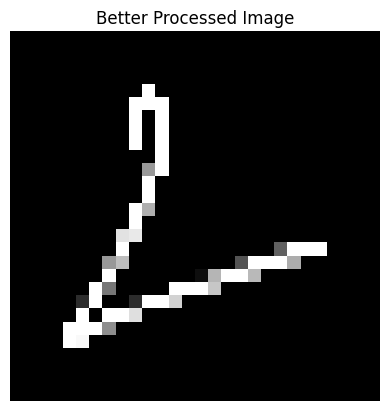

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)

# Blur slightly (remove noise)
img = cv2.GaussianBlur(img, (5,5), 0)

# Threshold
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get largest contour (digit)
cnt = max(contours, key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(cnt)
digit = thresh[y:y+h, x:x+w]

# Resize to 20x20
digit = cv2.resize(digit, (20,20))

# Create blank 28x28 image
final = np.zeros((28,28))

# Center digit
final[4:24, 4:24] = digit

# Normalize
final = final / 255.0

# Reshape
final = final.reshape(1,28,28,1)

# Show processed image
plt.imshow(final.reshape(28,28), cmap='gray')
plt.title("Better Processed Image")
plt.axis('off')
plt.show()


In [21]:
prediction = model.predict(final)
print("Predicted Digit:", np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Digit: 2
